In [1]:
# Importing relevant libraries for the data cleaning and exploration process.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setting style for the plots.

plt.style.use('ggplot')

In [3]:
# Creating a table based on the CSV file "Video_Games_Sales_as_at_22_Dec_2016".

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# Light Data Exploration

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [6]:
print('Columns Names:')
print('________________')
print()

for column in df.columns:
    print(column)

Columns Names:
________________

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating


In [7]:
print('Number of rows and values in the DataFrame: ',df.shape)

Number of rows and values in the DataFrame:  (16719, 16)


In [8]:
print('Column          | Data Type:')
print('________________','__________')

print(df.dtypes)

Column          | Data Type:
________________ __________
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


# Data Cleaning And Preperation

In [9]:
print("column's name | No. of Null values")
print('__________________________________')
print()

for column in df:
    print(column,sum(df[column].isnull()))

column's name | No. of Null values
__________________________________

Name 2
Platform 0
Year_of_Release 269
Genre 2
Publisher 54
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0
Global_Sales 0
Critic_Score 8582
Critic_Count 8582
User_Score 9129
User_Count 9129
Developer 6623
Rating 6769


In [10]:
# Checking for the presence of Null values in the Genre and name columns

df[(df['Name'].isnull()) | (df['Genre'].isnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping rows with Null values in Genre and name columns

df.drop(df.loc[(df['Name'].isnull()) | (df['Genre'].isnull())].index, inplace=True)

In [12]:
# Checking that rows with Null values in Genre and name columns have been deleted

df[(df['Name'].isnull()) | (df['Genre'].isnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [14]:
mean_global_sale_year_unknown = df[df['Year_of_Release'].isnull()]['Global_Sales'].mean()
mean_global_sale_year_known = df[df['Year_of_Release'].notnull()]['Global_Sales'].mean()

print('Average of global sales in millions dollars when year of release is KNOWN: ',round(mean_global_sale_year_known,2))
print('Average of global sales in millions dollars when year of release is UNKNOWN: ',round(mean_global_sale_year_unknown,2))
print()

print('Difference in percent: ',round(mean_global_sale_year_known/mean_global_sale_year_unknown*100,2),'%')

Average of global sales in millions dollars when year of release is KNOWN:  0.54
Average of global sales in millions dollars when year of release is UNKNOWN:  0.37

Difference in percent:  145.75 %


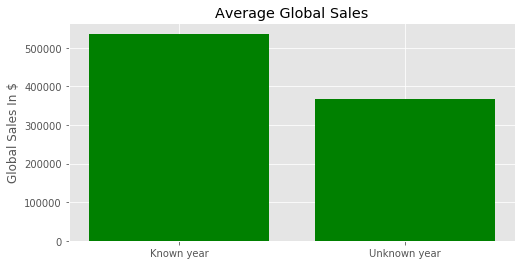

In [15]:
plt.figure(figsize=(8,4))
X1 = ['Known year', 'Unknown year']
Y1 = [mean_global_sale_year_known*1000000,mean_global_sale_year_unknown*1000000]
plt.bar(X1,Y1,color='green')
plt.title('Average Global Sales')
plt.ylabel('Global Sales In $')
plt.show()

In [16]:
mean_global_sale_publisher_known = df[df['Publisher'].notnull()]['Global_Sales'].mean()
mean_global_sale_publisher_unknown = df[df['Publisher'].isnull()]['Global_Sales'].mean()

print('Average of global sales in millions dollars when Publisher is Known: ',round(mean_global_sale_publisher_known,2))
print('Average of global sales in millions dollars when Publisher is Unknown:   ',round(mean_global_sale_publisher_unknown,2))
print()
print('Difference in percent: ',round(mean_global_sale_publisher_known/mean_global_sale_publisher_unknown*100,2),'%')

Average of global sales in millions dollars when Publisher is Known:  0.53
Average of global sales in millions dollars when Publisher is Unknown:    0.27

Difference in percent:  194.95 %


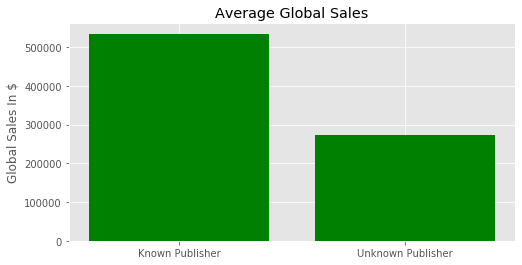

In [17]:
plt.figure(figsize=(8,4))
X1 = ['Known Publisher','Unknown Publisher']
Y1 = [mean_global_sale_publisher_known*1000000,mean_global_sale_publisher_unknown*1000000]
plt.bar(X1,Y1,color='green')
plt.title('Average Global Sales')
plt.ylabel('Global Sales In $')
plt.show()

In [18]:
print('''The number of missing values overlapped in the rows Critic_Score, Critic_Count, User_Score, User_Count,
Developer, Rating is:''')
print('________________________________________________________________________________________________________')

print(df[(df['Developer'].isnull()) & (df['Critic_Score'].isnull()) & (df['Critic_Count'].isnull())
   & (df['User_Score'].isnull()) & (df['User_Count'].isnull()) & (df['Rating'].isnull())]['Name'].count())

The number of missing values overlapped in the rows Critic_Score, Critic_Count, User_Score, User_Count,
Developer, Rating is:
________________________________________________________________________________________________________
6608


In [19]:
print('Average Global Sales:')
print('_____________________________________________________________________________________________')
print()
print(round(df['Global_Sales'].mean(),2))
print()

print('''Average Global Sales per game when the values in all the following rows are MISSING: 
Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating:''')
print('_____________________________________________________________________________________________')
print()
      
print(round(df[(df['Critic_Score'].isnull()) & (df['Critic_Count'].isnull()) & (df['User_Score'].isnull()) & (df['User_Count'].isnull()) & (df['Rating'].isnull()) & (df['Developer'].isnull())]['Global_Sales'].mean(),2))

print()
print('''Average Global Sales per game when the values in all the following rows are NOT MISSING: 
Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating:''')
print('_____________________________________________________________________________________________')
print()
      
print(round(df[(df['Critic_Score'].notnull()) & (df['Critic_Count'].notnull()) & (df['User_Score'].notnull()) & (df['User_Count'].notnull()) & (df['Rating'].notnull()) & (df['Developer'].notnull())]['Global_Sales'].mean(),2))

Average Global Sales:
_____________________________________________________________________________________________

0.53

Average Global Sales per game when the values in all the following rows are MISSING: 
Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating:
_____________________________________________________________________________________________

0.43

Average Global Sales per game when the values in all the following rows are NOT MISSING: 
Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating:
_____________________________________________________________________________________________

0.77


In [20]:
# Convert data type of Year_of_Release column to integer data type.

df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

In [21]:
# Converting User_Count data type from object data type to numeric data type.

df['User_Count'] = pd.to_numeric(df['User_Count'])

# Converting User_Count, Year_of_Release and Critic_Count data types to integer.

df['User_Count'] = df['User_Count'].astype('Int64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')

In [22]:
print('Column          | Data Type:')
print('________________','__________')

print(df.dtypes)

Column          | Data Type:
________________ __________
Name                object
Platform            object
Year_of_Release      Int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count         Int64
User_Score         float64
User_Count           Int64
Developer           object
Rating              object
dtype: object


In [23]:
# Checking that the user score rate is between 0-10.

print('Max User Score: ',df['User_Score'].max())
print('Min User Score: ',df['User_Score'].min())

Max User Score:  9.7
Min User Score:  0.0


In [24]:
# Making sure the user score value is not greater than 0 when User_Count equals zero or Null

df[(df['User_Count'].isnull()) & (df['User_Score'].notnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [25]:
# Making sure the critic score value is not greater than 0 when Critic_Count equals zero or Null

df[(df['Critic_Count'].isnull()) & (df['Critic_Score'].notnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [26]:
# Verifying that there are no situations where users gave scores but the User_Score  value is null

df[(df['User_Count']>1) & (df['User_Score'].isnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [27]:
# Verifying that there are no situations where critics gave scores but the Critic_Score value is null

df[(df['Critic_Count']>1) & (df['Critic_Score'].isnull())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [28]:
# Checking if the value in the Global_Sales column proximity equals the sum of the columns representing sales.

df[(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] != df['Global_Sales'])  & (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] +0.01 != df['Global_Sales']) & (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] -0.01 != df['Global_Sales']) & (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']-0.02 != df['Global_Sales'])& (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']+0.02 != df['Global_Sales']+0.02)][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
2,15.68,12.76,3.79,3.29,35.52
5,23.20,2.26,4.22,0.58,30.26
11,9.71,7.47,4.13,1.90,23.21
17,9.43,0.40,0.41,10.57,20.81
...,...,...,...,...,...
15149,0.02,0.01,0.00,0.00,0.02
15153,0.02,0.01,0.00,0.00,0.02
15158,0.02,0.01,0.00,0.00,0.02
15206,0.02,0.01,0.00,0.00,0.02


In [29]:
# Check if the Global_Sales value is significantly different (more than 0.02) than the expected value

df[(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] > df['Global_Sales'] + 0.02)  | (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']  < df['Global_Sales'] - 0.02)][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
106,3.27,2.22,1.4,0.29,7.16
6395,0.12,0.11,0.0,0.02,0.27


It is reasonable that the value in Global_Sales is not the exact same as expected, but it is close due to the data including values that included only two decimals.

In [30]:
'''
Correcting the wrong values in the Global_Sales column based on the total of the sales in the NA_Sales,
EU_Sales, JP_Sales and Other_Sales columns
'''

df ['Global_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] 

In [31]:
# Verifying that the values are correct

df[(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] > df['Global_Sales'])  | (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']  < df['Global_Sales'])][['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [32]:
# Dropping duplicates if they exist

df = df.drop_duplicates()

In [33]:
# Checking video game names for duplicates

df['Name'].value_counts().head(20)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
FIFA 15                                     8
Cars                                        8
LEGO Jurassic World                         8
FIFA Soccer 13                              8
LEGO Harry Potter: Years 5-7                8
LEGO Star Wars II: The Original Trilogy     8
Lego Batman 3: Beyond Gotham                8
The LEGO Movie Videogame                    8
LEGO The Hobbit                             8
Madden NFL 08                               8
Angry Birds Star Wars                       8
Terraria                                    8
Monopoly                                    8
Skylanders: SuperChargers                   7
Harry Potter and the Half-Blood Prince      7
Name: Name, dtype: int64

In [34]:
df[df['Name'] == 'Need for Speed: Most Wanted']

# The result means that some games can be released in different years and on different platforms, so game_id is necessary.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36,9.1,137,EA Canada,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54,8.5,134,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54,8.5,134,EA Canada,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32,8.8,29,EA Canada,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18,9.1,22,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19,8.5,525,Black Box,T
6274,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6411,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4,6.1,22,EA Canada,E


# Data Exploration

(10.0, 0.0)

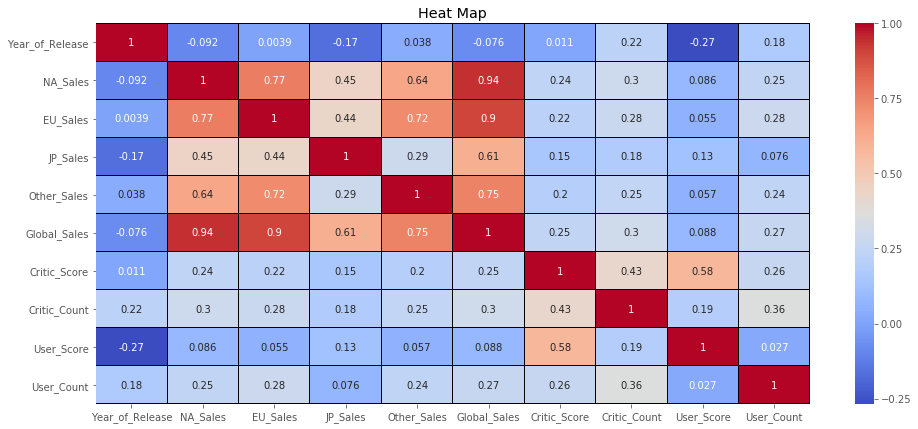

In [35]:
# Checking correlations between the numerical columns

plt.figure(figsize=(16,7))
plt.title('Heat Map')


ax = sns.heatmap(df.corr(),cmap='coolwarm',linecolor='black',linewidth=0.05,annot=True)

ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

Text(0.5, 1.0, 'Global Sales Distribution - 0 To 40M$ Sales')

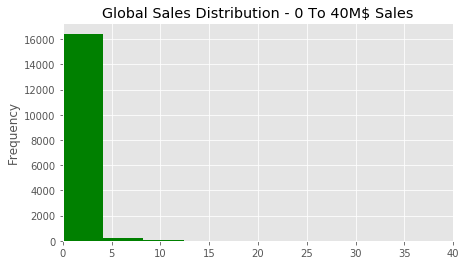

In [36]:
plt.figure(figsize=(7,4))

df['Global_Sales'].plot(kind='hist',color='green',bins=20)
plt.xlim([0,40])
plt.title ('Global Sales Distribution - 0 To 40M$ Sales')

Text(0.5, 0, 'Genre')

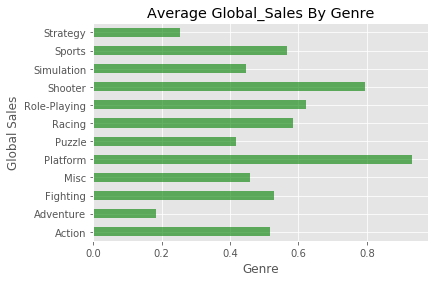

In [37]:
df.groupby('Genre').Global_Sales.mean().plot(kind='barh',color='green',alpha=0.6)
plt.title('Average Global_Sales By Genre')
plt.ylabel('Global Sales')
plt.xlabel('Genre')

Platform games:

Often simplified as platformer or jump 'n' run games) are a video game genre and subgenre of action games in which the core objective is to move the player character between points in a rendered environment. 

In [40]:
mean_global_sale_rating_known = df[df['Rating'].notnull()]['Global_Sales'].mean()
mean_global_sale_rating_unknown = df[df['Rating'].isnull()]['Global_Sales'].mean()

print('Average of global sales in millions dollars when Rating is KNOWN: ',round(mean_global_sale_year_known,2))
print('Average of global sales in millions dollars when Rating is UNKNOWN: ',round(mean_global_sale_rating_unknown,2))
print()

print('Difference in percent: ',round(mean_global_sale_rating_known/mean_global_sale_rating_unknown*100,2),'%')

Average of global sales in millions dollars when Rating is KNOWN:  0.54
Average of global sales in millions dollars when Rating is UNKNOWN:  0.42

Difference in percent:  144.92 %


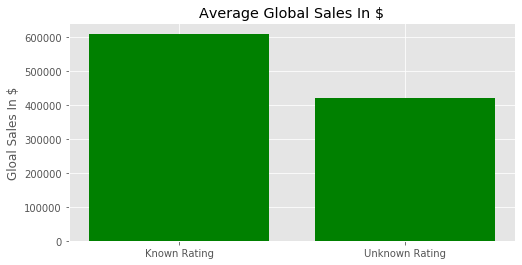

In [41]:
plt.figure(figsize=(8,4))
X = ['Known Rating', 'Unknown Rating']
Y = [mean_global_sale_rating_known*1000000,mean_global_sale_rating_unknown*1000000]
plt.bar(X,Y,color='green')
plt.title('Average Global Sales In $')
plt.ylabel('Gloal Sales In $')
plt.show()

Can clearly see the correlation between the sals columns.
There is a strong correlation also between Critic Score and User Score.

Text(0.5, 0, 'Rating - Game Category')

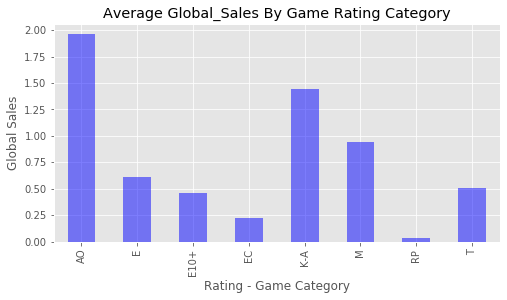

In [42]:
plt.figure(figsize=(8,4))
df.groupby('Rating').Global_Sales.mean().plot(kind='bar',color='blue',alpha=0.5)
plt.title('Average Global_Sales By Game Rating Category')
plt.ylabel('Global Sales')
plt.xlabel('Rating - Game Category')

Ratings guide:

* Ao - Adults Only - Ages 18 and up.
* E- Everyone.
* E10+ - Ages 10 and up.
* EC - Ages 3 years and older.
* K-A - Ages 6 and up.
* M- Mature - Ages 17 and up.
* RP - Rating Pending - Not assigned yet a final rating.
* T- Teen - Ages 13 and up.

In [43]:
print('Number Of Unique Developers: ',df['Developer'].nunique())
print('Number Of Unique Publishers: ',df['Publisher'].nunique())
print('Number Of Unique Platforms: ',df['Platform'].nunique())

Number Of Unique Developers:  1696
Number Of Unique Publishers:  582
Number Of Unique Platforms:  31


Text(0.5, 1.0, 'User Count Distribution - 0 to 5,000 users reviews')

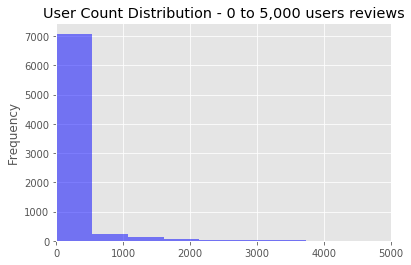

In [44]:
plt.figure(figsize=(6,4))

df['User_Count'].plot(kind='hist',color='blue',bins=20,alpha=0.5)
plt.xlim([0,5000])
plt.title ('User Count Distribution - 0 to 5,000 users reviews')

Text(0.5, 1.0, 'User Score Distribution')

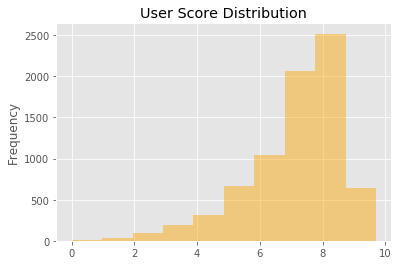

In [45]:
# User score distirbution

df['User_Score'].plot(kind='hist',color='orange',alpha=0.45)
plt.title ('User Score Distribution')

Text(0.5, 1.0, 'Critic Score Distribution')

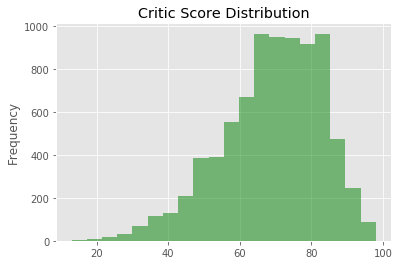

In [46]:
df['Critic_Score'].plot(kind='hist',bins=20,color='green',alpha=0.5)
plt.title ('Critic Score Distribution')

In [47]:
# Average Global Sales for a video game when the developer and publisher are the same.

same = round(df[df['Developer'] == df['Publisher']]['Global_Sales'].mean()*1000000,2)
different = round(df[(df['Developer'] != df['Publisher']) & (df['Developer'].notnull()) & (df['Publisher'].notnull())]['Global_Sales'].mean()*1000000,2)

print('Average Global Sales for a video game when the developer and publisher are the same: ',same)
print('Average Global Sales for a video game when the developer and publisher are different companies: ',different)
print('Percent difference: ',round(same/different*100,2),'%')

Average Global Sales for a video game when the developer and publisher are the same:  849473.68
Average Global Sales for a video game when the developer and publisher are different companies:  569152.73
Percent difference:  149.25 %


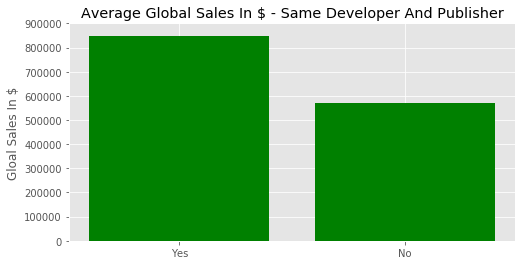

In [48]:
plt.figure(figsize=(8,4))
X = ['Yes', 'No']
Y = [same,different]
plt.bar(X,Y,color='green')
plt.ylim([0,900000])
plt.title('Average Global Sales In $ - Same Developer And Publisher')
plt.ylabel('Gloal Sales In $')
plt.show()

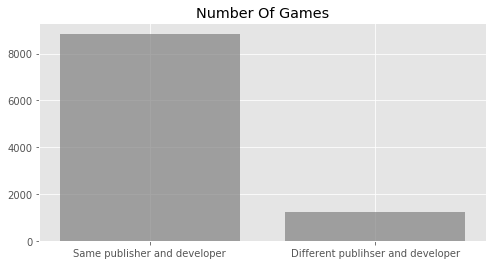

In [49]:
# Checking the number of games produced by the same developer and publisher against those produced by different ones.

same_publisher_developer_count = df[(df['Developer'] != df['Publisher']) & (df['Developer'].notnull()) & (df['Publisher'].notnull())]['Global_Sales'].count()
Different_publihser_developer_count = df[df['Developer'] == df['Publisher']]['Global_Sales'].count()

plt.figure(figsize=(8,4))
X = ['Same publisher and developer', 'Different publihser and developer']
Y = [same_publisher_developer_count,Different_publihser_developer_count]
plt.bar(X,Y,color='grey',alpha=0.7)
plt.title('Number Of Games')
plt.show()

# Feature Engineering

In [50]:
# Adding a column of user score scale to the data frame.

df['User_Score_Scale'] = None
df.loc[(df['User_Score'] < 4.),'User_Score_Scale'] = '0-3.99'
df.loc[(df['User_Score'] >=4.) & (df['User_Score'] < 6.),'User_Score_Scale'] = '4-5.99'
df.loc[(df['User_Score'] >=6.) & (df['User_Score'] < 8.),'User_Score_Scale'] = '6-7.99'
df.loc[(df['User_Score'] >=8.),'User_Score_Scale'] = '8-10'

In [51]:
# Adding a column of critic score scale to the data frame.

df['Critic_Score_Scale'] = None
df.loc[(df['Critic_Score'] < 40.),'Critic_Score_Scale'] = '0-39.99'
df.loc[(df['Critic_Score'] >=40.) & (df['Critic_Score'] < 60.),'Critic_Score_Scale'] = '40-50.99'
df.loc[(df['Critic_Score'] >=60.) & (df['Critic_Score'] < 80.),'Critic_Score_Scale'] = '60-70.99'
df.loc[(df['Critic_Score'] >=80.),'Critic_Score_Scale'] = '80-100'

In [52]:
# Adding columns of Is_Rated that indicates if a game was rated by the ESRB.

df.loc[df.Rating.notnull(), 'Is_Rated'] = 1
df.loc[df.Rating.isnull(), 'Is_Rated'] = 0

# Adding columns of Was_Criticized that indicates if a game was Criticized by a critic.

df.loc[df.Critic_Score.notnull(), 'Was_Criticized'] = 1
df.loc[df.Critic_Score.isnull(), 'Was_Criticized'] = 0

# Adding columns of Was_Scored_By_Users that indicates if a game was scored by user/users.

df.loc[df.User_Score.notnull(), 'Was_Scored_By_Users'] = 1
df.loc[df.User_Score.isnull(), 'Was_Scored_By_Users'] = 0

In [55]:
# Adding a column that indicated if the developer of a game is also the publisher of the game.

df['Same_Developer_And_Publisher']= None
df.loc[(df['Developer'] == df['Publisher']),'Same_Developer_And_Publisher'] = 'Yes'
df.loc[((df['Developer'] != df['Publisher']) & (df['Developer'].notnull()) & (df['Publisher'].notnull())),'Same_Developer_And_Publisher'] = 'No'

In [57]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,User_Score_Scale,Critic_Score_Scale,Is_Rated,Was_Criticized,Was_Scored_By_Users,Same_Developer_And_Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,...,8.0,322,Nintendo,E,8-10,60-70.99,1.0,1.0,1.0,Yes
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.0,None
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,8.3,709,Nintendo,E,8-10,80-100,1.0,1.0,1.0,Yes
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,8.0,192,Nintendo,E,8-10,80-100,1.0,1.0,1.0,Yes
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,...,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.0,None


In [61]:
print('Columns Names: ')
print('_______________')
print()

for i in df.columns:
    print(i)

Columns Names: 
_______________

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating
User_Score_Scale
Critic_Score_Scale
Is_Rated
Was_Criticized
Was_Scored_By_Users
Same_Developer_And_Publisher


# Data Exploration For Scale Columns

Text(0.5, 0, 'User Score Scale')

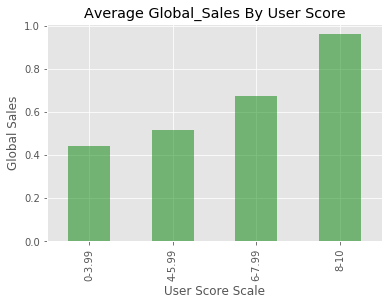

In [62]:
df.groupby('User_Score_Scale').Global_Sales.mean().plot(kind='bar',color='green',alpha=0.5)
plt.title('Average Global_Sales By User Score')
plt.ylabel('Global Sales')
plt.xlabel('User Score Scale')

Text(0.5, 0, 'Critic Score Scale')

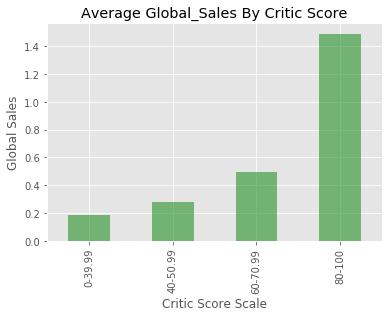

In [63]:
df.groupby('Critic_Score_Scale').Global_Sales.mean().plot(kind='bar',color='green',alpha=0.5)
plt.title('Average Global_Sales By Critic Score')
plt.ylabel('Global Sales')
plt.xlabel('Critic Score Scale')

(13.0, 0.0)

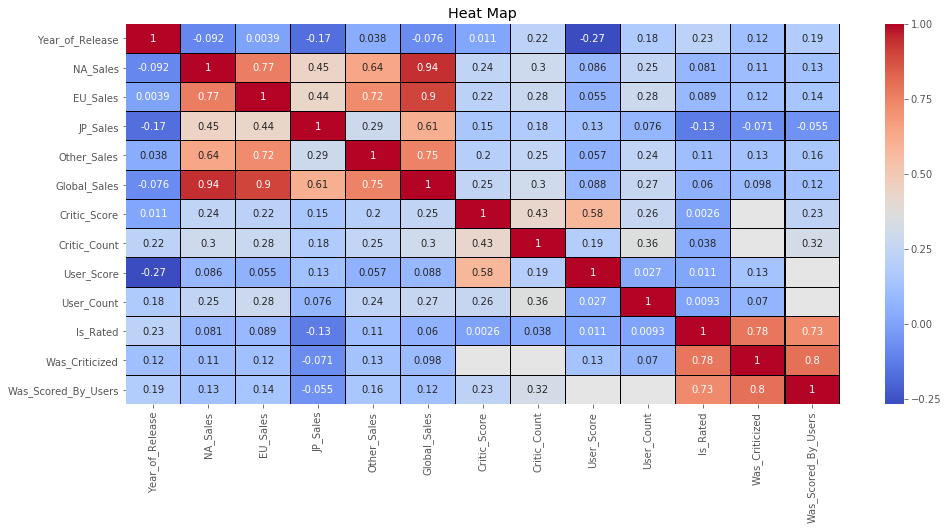

In [64]:
# The following columns show a very high correlation: Was_Scored_By_Users, Is_Rated, and Was_Criticized.

plt.figure(figsize=(16,7))
plt.title('Heat Map')


ax = sns.heatmap(df.corr(),cmap='coolwarm',linecolor='black',linewidth=0.05,annot=True)

ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

# Exporting to CSV file

In [65]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,User_Score_Scale,Critic_Score_Scale,Is_Rated,Was_Criticized,Was_Scored_By_Users,Same_Developer_And_Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,...,8.0,322,Nintendo,E,8-10,60-70.99,1.0,1.0,1.0,Yes
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.0,None
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,8.3,709,Nintendo,E,8-10,80-100,1.0,1.0,1.0,Yes
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,8.0,192,Nintendo,E,8-10,80-100,1.0,1.0,1.0,Yes
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,...,NaN,NaN,NaN,NaN,None,None,0.0,0.0,0.0,None


In [66]:
# Exporting to CSV file

df.to_csv('Video Games Edited By Python.csv', index = False)